<a href="https://colab.research.google.com/github/ideepankarsharma2003/Colab-Tutorials/blob/CNN/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os

In [12]:
!ls

drive  sample_data


In [ ]:
# !wget -P '/content/drive/MyDrive/Colab Notebooks/Baby-Healthcare System/Emotion_detection_classifier/dataset' https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

In [ ]:
# !unzip '/content/drive/MyDrive/Colab Notebooks/Baby-Healthcare System/Emotion_detection_classifier/dataset/dataset.zip?dl=0' -d '/content/drive/MyDrive/Colab Notebooks/Baby-Healthcare System/Emotion_detection_classifier/dataset'
!unzip '/content/drive/MyDrive/Colab Notebooks/Baby-Healthcare System/Emotion_detection_classifier/dataset/dataset.zip?dl=0'

In [14]:
!ls -la

total 28
drwxr-xr-x 1 root root 4096 Jul 10 15:46 .
drwxr-xr-x 1 root root 4096 Jul 10 15:40 ..
drwxr-xr-x 4 root root 4096 Jul  6 13:21 .config
drwx------ 5 root root 4096 Jul 10 15:41 drive
drwxr-xr-x 1 root root 4096 Jul  6 13:22 sample_data
drwxr-xr-x 9 root root 4096 Jul 10 15:46 test
drwxr-xr-x 9 root root 4096 Jul 10 15:46 train


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [16]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [17]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [18]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [19]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

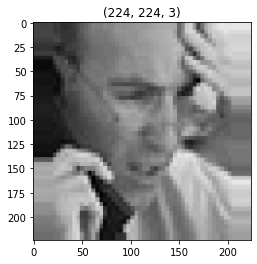

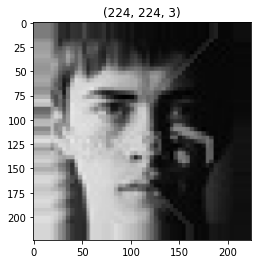

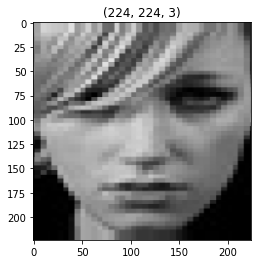

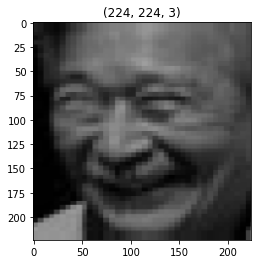

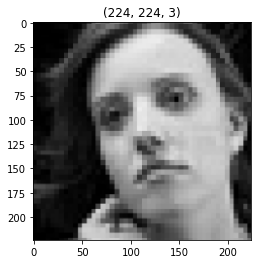

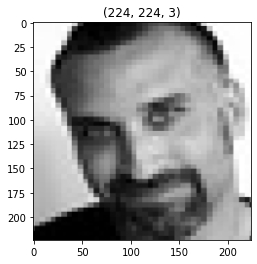

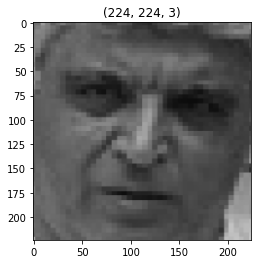

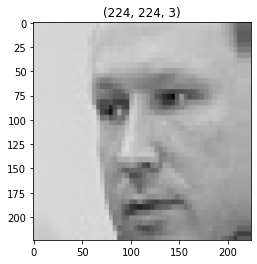

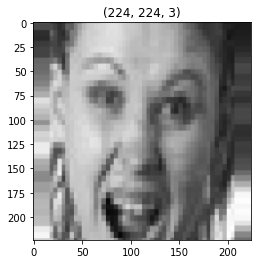

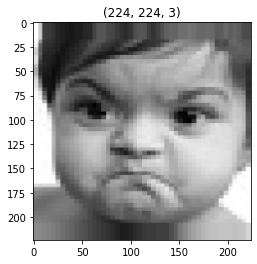

In [20]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [21]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [22]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 20.6525 - accuracy: 0.1937
Epoch 1: val_accuracy improved from -inf to 0.30469, saving model to best_model.h5
10/10 [==============================] - 16s 457ms/step - loss: 20.6525 - accuracy: 0.1937 - val_loss: 16.1336 - val_accuracy: 0.3047
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 12.9072 - accuracy: 0.2406
Epoch 2: val_accuracy improved from 0.30469 to 0.33984, saving model to best_model.h5
10/10 [==============================] - 4s 393ms/step - loss: 12.9072 - accuracy: 0.2406 - val_loss: 12.8702 - val_accuracy: 0.3398
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 9.7427 - accuracy: 0.3094 
Epoch 3: val_accuracy improved from 0.33984 to 0.39062, saving model to best_model.h5
10/10 [==============================] - 4s 388ms/step - loss: 9.7427 - accuracy: 0.3094 - val_loss: 9.4128 - val_accuracy: 0.3906
Epoch 4/30
10/10 [==============================] - ETA: 0s - 

In [23]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")
# model = load_model("/content/drive/MyDrive/Colab Notebooks/Baby-Healthcare System/Emotion_detection_classifier/best_model.h5")

In [24]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

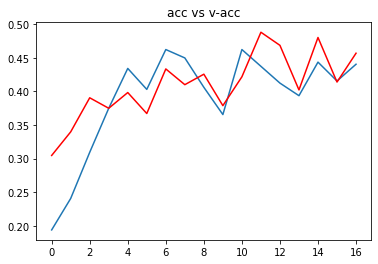

In [25]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

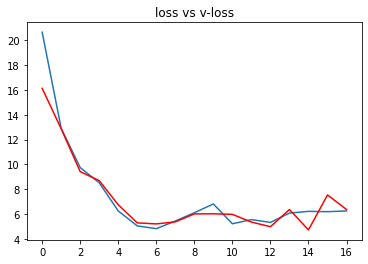

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [27]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of fear


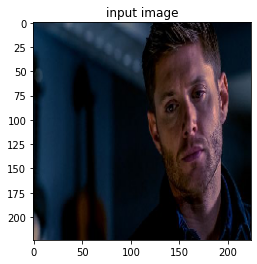

In [34]:
# path for the image to see if it predics correct class

# path = "/content/test/angry/PrivateTest_1054527.jpg"
# path = "/content/soldierboy.jpg"
path = "/content/dean1.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

 the image is of fear


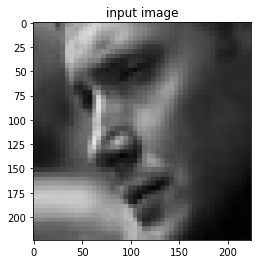

In [39]:
# path for the image to see if it predics correct class

path = "/content/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [42]:
import cv2
import numpy as np
from IPython.display import clear_output, Image
from google.colab.patches import cv2_imshow
import time

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
# cap = cv2.VideoCapture('chaplin.mp4')
cap = cv2.VideoCapture('/content/dean2.gif')


# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    # Display the resulting frame
    # clear_output(wait=True)
    cv2_imshow(frame)
    #delay time to update frame
    # time.sleep(1.1)
    # cv2_imshow(frame)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

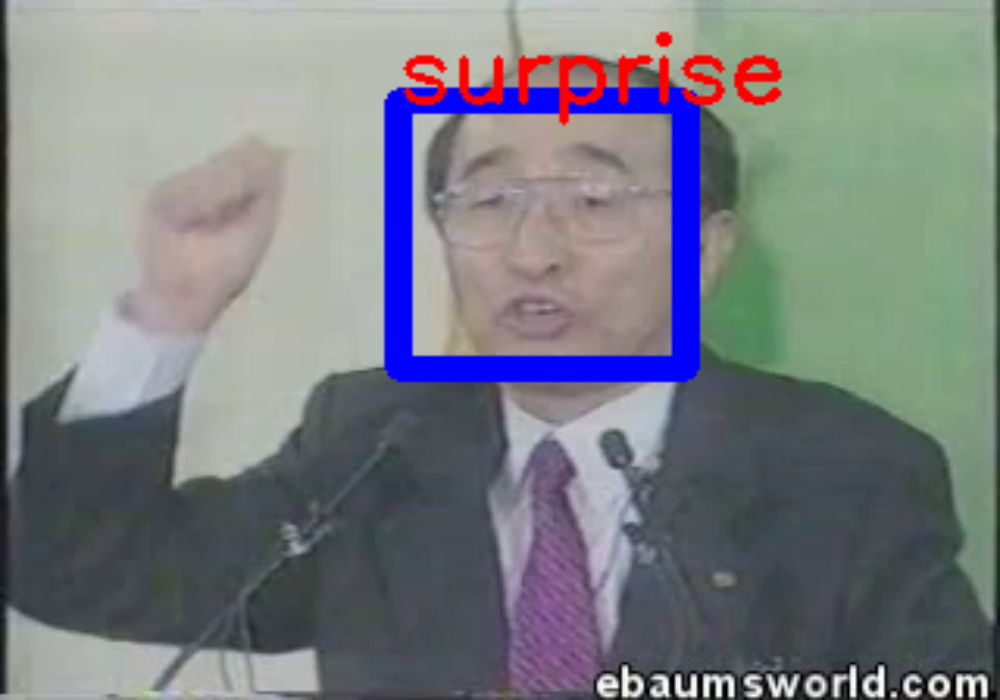

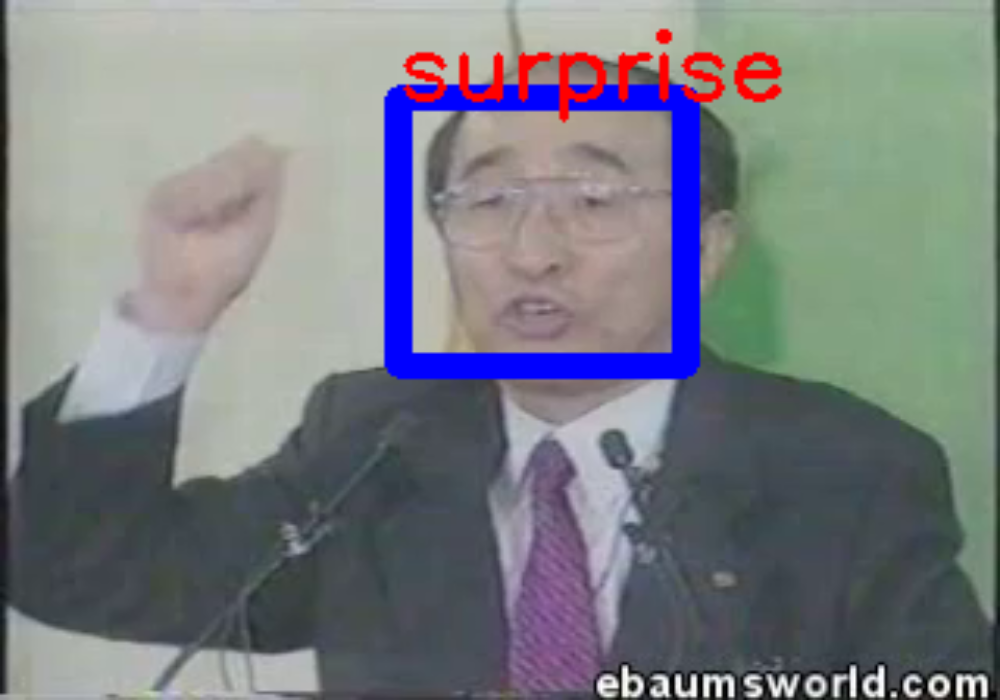

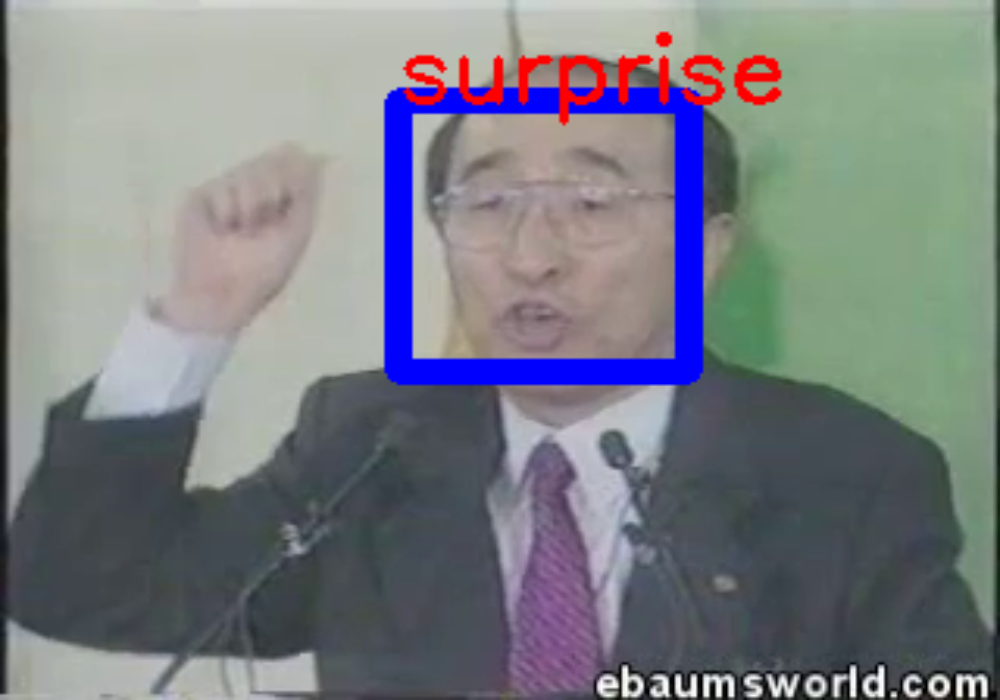

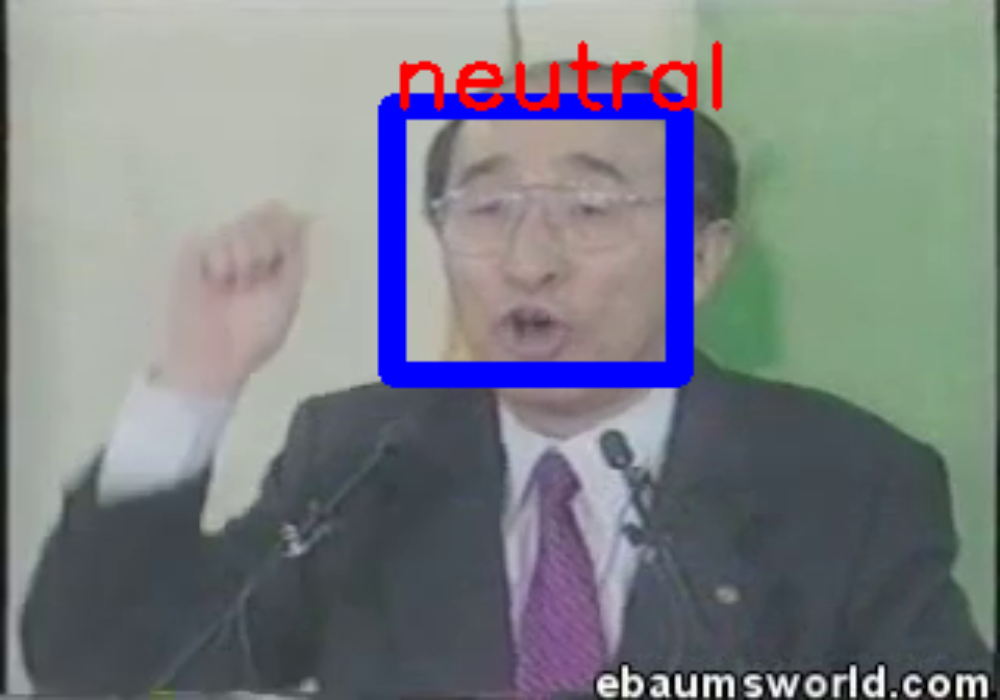

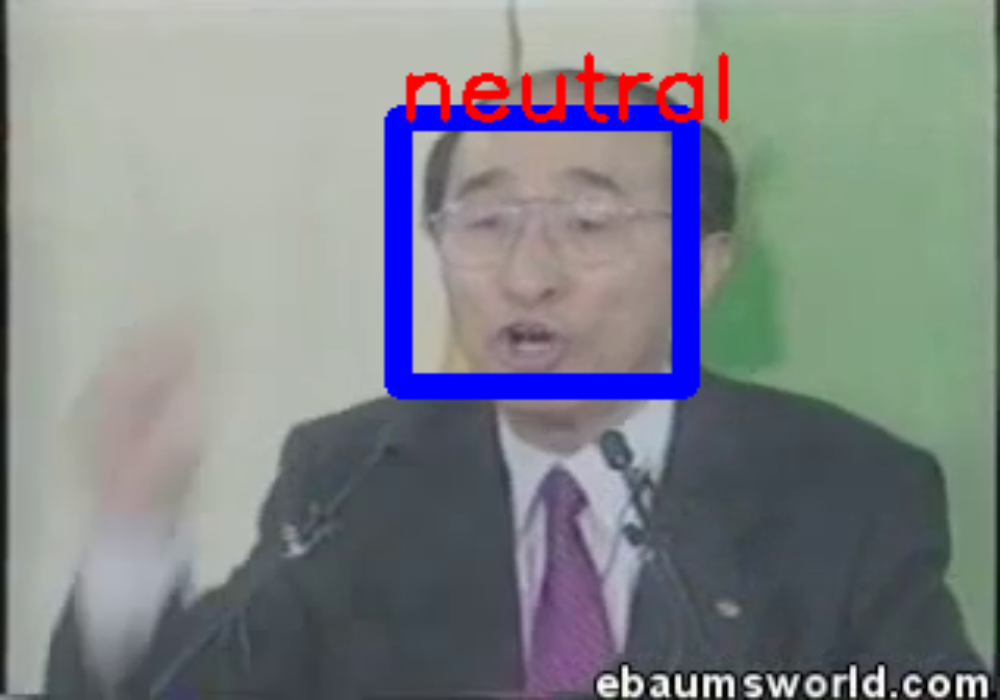

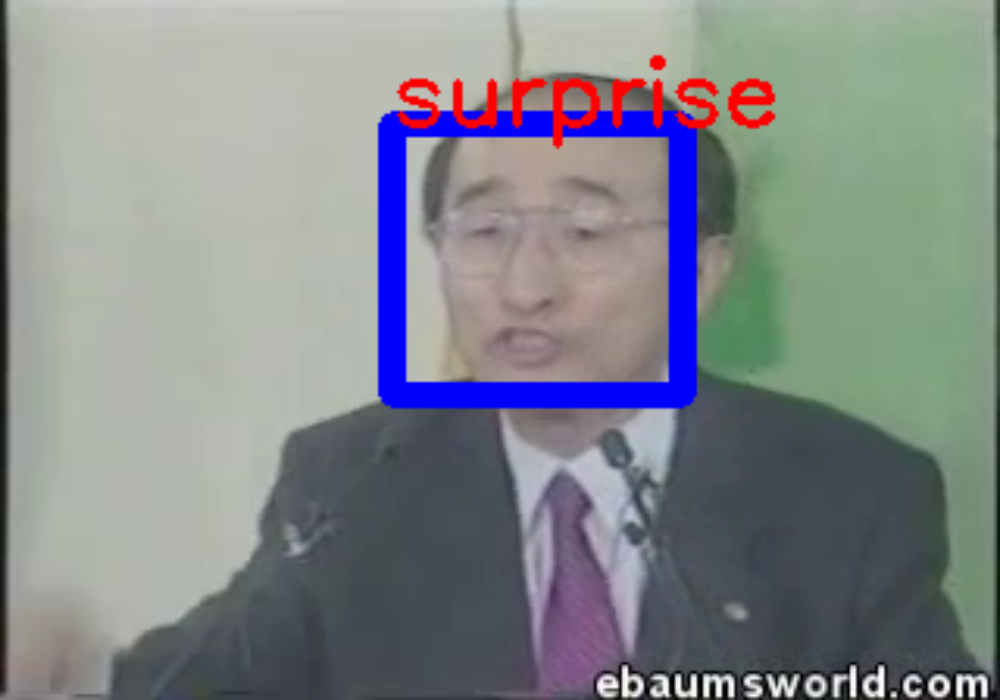

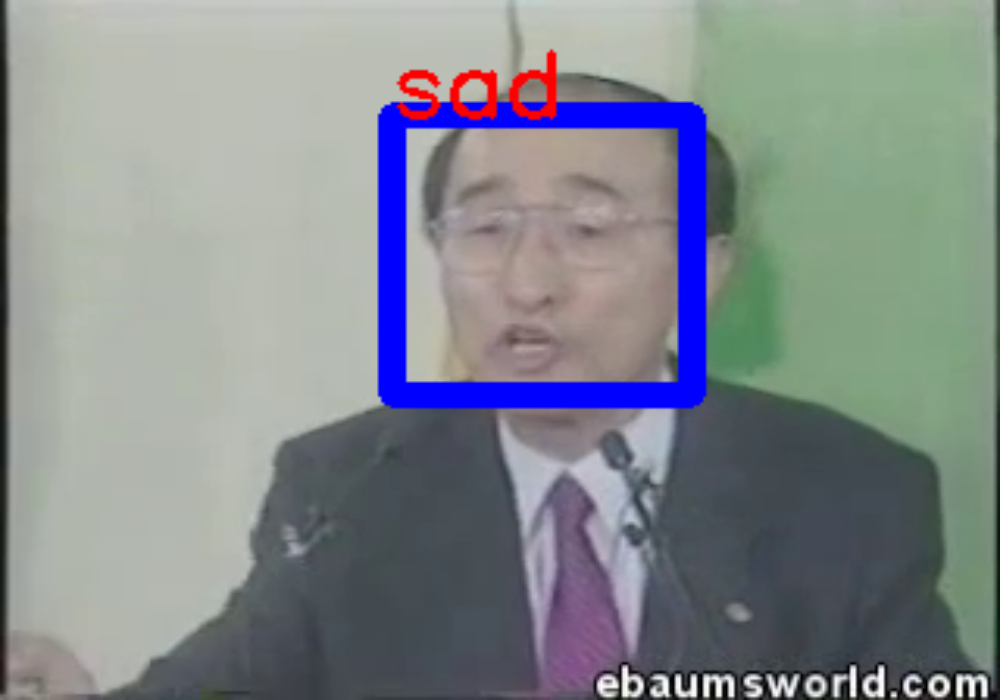

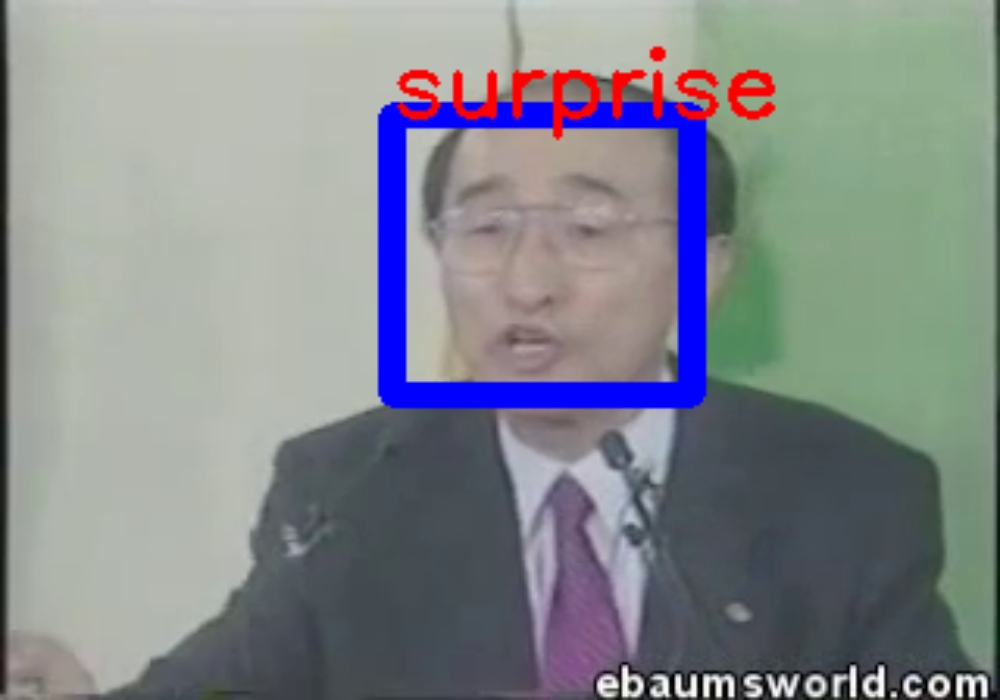

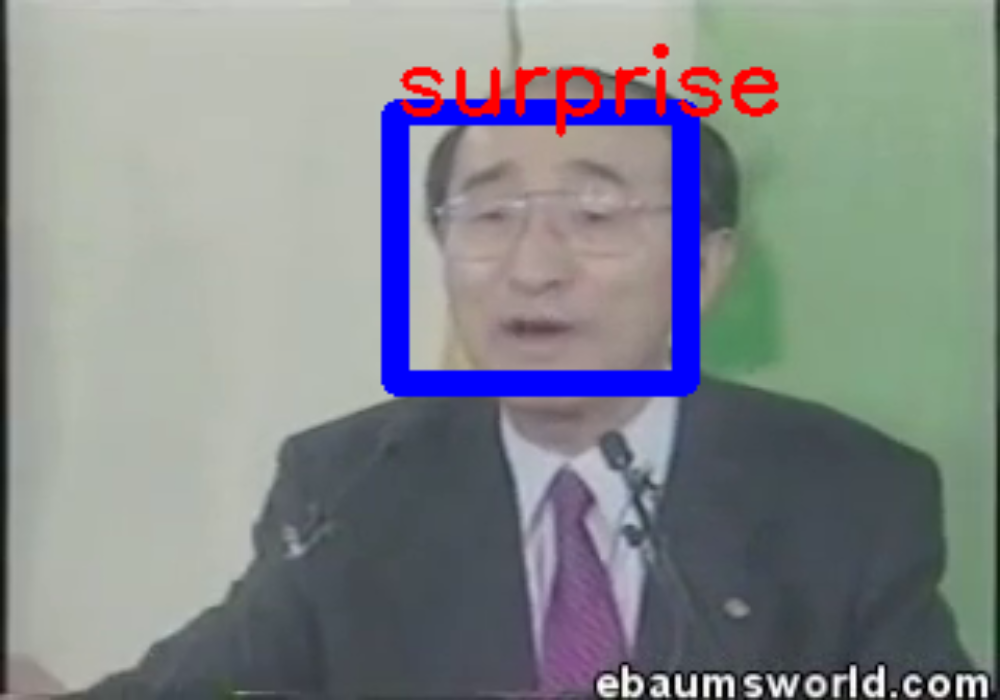

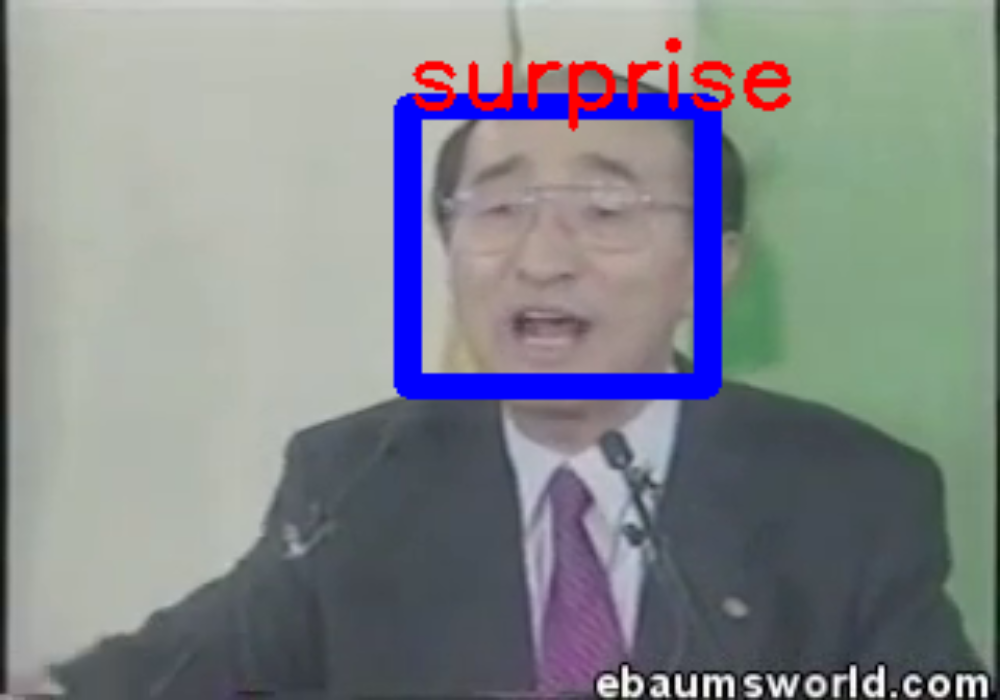

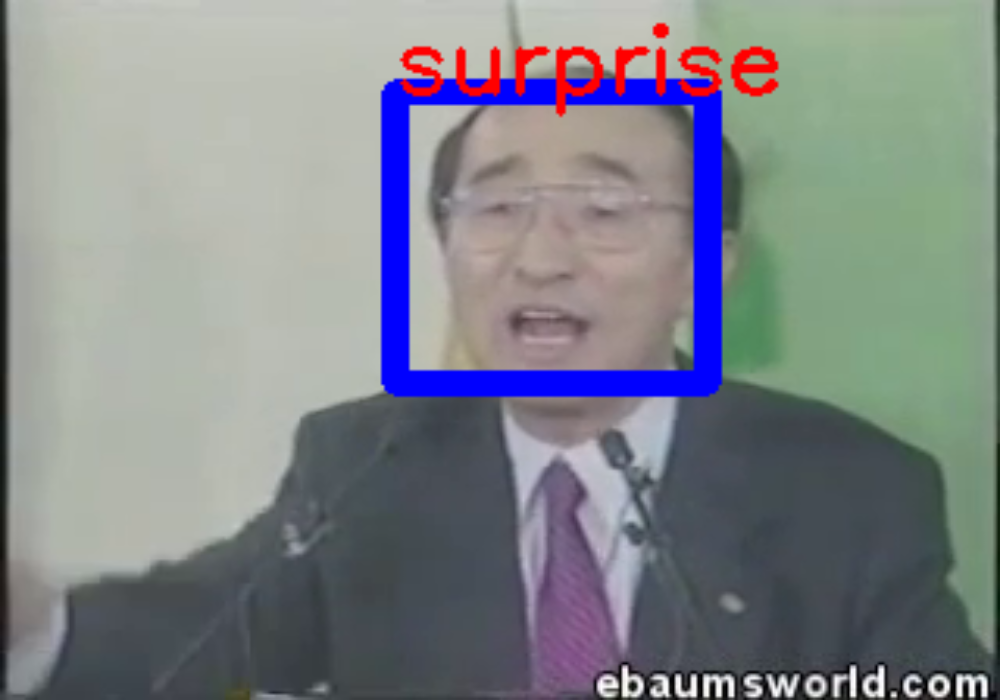

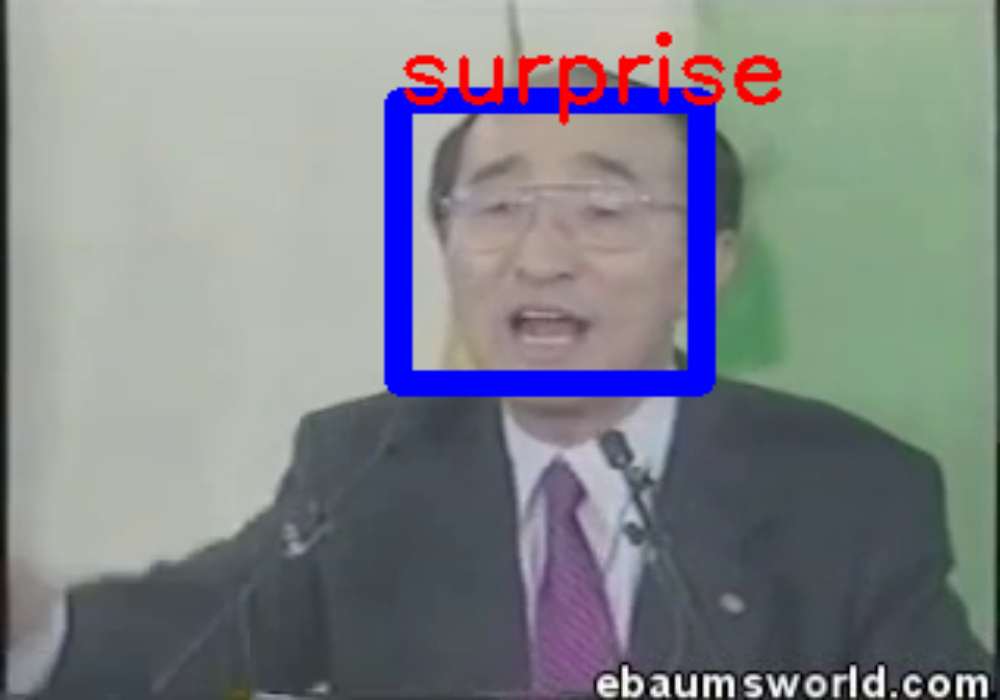

In [ ]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array 
# from keras.preprocessing import image 
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output, Image
from google.colab.patches import cv2_imshow
import time

# load model
model = load_model("best_model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Baby-Healthcare System/Emotion_detection_classifier/y2mate.com - Best Cry Ever_720p.mp4')
cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Baby-Healthcare System/Emotion_detection_classifier/y2mate.com - Make you laugh in 5 seconds_360p.mp4')
while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    # cv2.imshow('Facial emotion analysis ', resized_img)
    # clear_output(wait=True)
    # cv2_imshow(frame)
    #delay time to update frame
    cv2_imshow(resized_img)
    # time.sleep(1.1)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows